In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

data = pd.read_csv('data/model_data.csv')

X_train = pd.read_csv('data/X_train_transformed.csv')
X_test = pd.read_csv('data/X_test_transformed.csv')
y_train = pd.read_csv('data/y_train_transformed.csv')
y_test = pd.read_csv('data/y_test_transformed.csv')

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51162 entries, 0 to 51161
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_blue-collar              51162 non-null  float64
 1   job_retired                  51162 non-null  float64
 2   job_student                  51162 non-null  float64
 3   marital_single               51162 non-null  float64
 4   education_university.degree  51162 non-null  float64
 5   education_basic.9y           51162 non-null  float64
 6   default                      51162 non-null  float64
 7   contact                      51162 non-null  float64
 8   campaign                     51162 non-null  float64
 9   contacted_before             51162 non-null  float64
 10  previous                     51162 non-null  float64
 11  poutcome_nonexistent         51162 non-null  float64
 12  emp.var.rate                 51162 non-null  float64
 13  cons.price.idx  

C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptr

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     10964
           1       0.40      0.51      0.45      1392

    accuracy                           0.86     12356
   macro avg       0.67      0.71      0.69     12356
weighted avg       0.88      0.86      0.87     12356



C:\Users\wyver\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


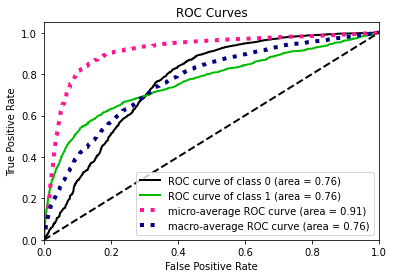

In [10]:

from sklearn.metrics import RocCurveDisplay,roc_auc_score, f1_score,accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.calibration import CalibratedClassifierCV
clf = MLPClassifier(hidden_layer_sizes=[20,15,10], activation='tanh', random_state=420, max_iter=300)

calibrated_clf = CalibratedClassifierCV(clf, method='isotonic').fit(X_train, y_train)
#Classes are ordered [0,1]
y_pred = calibrated_clf.predict_proba(X_test)
y_pred = [i[1] for i in y_pred]
y_score = y_pred
y_pred = pd.Series(list(np.where(np.array(y_pred) > 0.5, 1, 0 ))) 

report = classification_report(y_test, y_pred)
print(report)
import scikitplot as skplt
import matplotlib.pyplot as plt


#Plot AOC Curves
y_probas = calibrated_clf.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()

In [5]:
y_pred

0        0
1        0
2        0
3        0
4        0
        ..
12351    1
12352    0
12353    0
12354    1
12355    0
Length: 12356, dtype: int32

In [11]:
y_probas

array([[0.72887016, 0.27112984],
       [0.74307224, 0.25692776],
       [0.62929218, 0.37070782],
       ...,
       [0.77453651, 0.22546349],
       [0.13963497, 0.86036503],
       [0.85347581, 0.14652419]])